In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import re
from ast import literal_eval

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/FigureS5/"

In [50]:
#show that the number of rescuable genotypes are robust in different #of genotypes with additional substitutions
resall_data = pd.read_csv(readdata_dir + "RescuabilityFile/all_rescuability.tsv",sep ="\t")
resall_data

,aa_seq,s,dist_Scer,mut_list_Scer,rescuability,#genotypesWithAddiSubs,segment
0,NAVGAVRGVERFGSGFAPLDEALSRSVVDL,0.0,4,106N:108V:115E:131S,0.127229,335,1
1,EAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,4,108I:115E:131S:135F,0.178624,764,1
2,NAIGAVRGIERFGSGFAPLDEALSRSVVDL,0.0,5,106N:108I:114I:115E:131S,0.180260,118,1
3,NAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,5,106N:108I:115E:131S:135F,0.057911,195,1
4,NAIGAVRGVTRFGSGFAPLDEALSRSVVDF,0.0,5,106N:108I:115T:131S:135F,0.439164,222,1
...,...,...,...,...,...,...,...
60742,AFFSRDTNETKIQVSLGLE,0.0,9,7F:8F:9S:11D:19V:20S:21L:22G:24E,0.000000,1,12
60743,ASINRDTNETKIQDSLCLD,0.0,9,7S:8I:9N:11D:19D:20S:21L:22C:24D,0.000000,1,12
60744,ASINRDTNETKIQDSIGID,0.0,9,7S:8I:9N:11D:19D:20S:22G:23I:24D,0.000000,1,12
60745,AFVNRNTNETKIQDSLCIN,0.0,9,7F:9N:11N:19D:20S:21L:22C:23I:24N,0.000000,2,12


In [51]:
resall_data["log10AllN"] = [np.log10(i) for i in resall_data["#genotypesWithAddiSubs"].values]
resall_data

,aa_seq,s,dist_Scer,mut_list_Scer,rescuability,#genotypesWithAddiSubs,segment,log10AllN
0,NAVGAVRGVERFGSGFAPLDEALSRSVVDL,0.0,4,106N:108V:115E:131S,0.127229,335,1,2.525045
1,EAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,4,108I:115E:131S:135F,0.178624,764,1,2.883093
2,NAIGAVRGIERFGSGFAPLDEALSRSVVDL,0.0,5,106N:108I:114I:115E:131S,0.180260,118,1,2.071882
3,NAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,5,106N:108I:115E:131S:135F,0.057911,195,1,2.290035
4,NAIGAVRGVTRFGSGFAPLDEALSRSVVDF,0.0,5,106N:108I:115T:131S:135F,0.439164,222,1,2.346353
...,...,...,...,...,...,...,...,...
60742,AFFSRDTNETKIQVSLGLE,0.0,9,7F:8F:9S:11D:19V:20S:21L:22G:24E,0.000000,1,12,0.000000
60743,ASINRDTNETKIQDSLCLD,0.0,9,7S:8I:9N:11D:19D:20S:21L:22C:24D,0.000000,1,12,0.000000
60744,ASINRDTNETKIQDSIGID,0.0,9,7S:8I:9N:11D:19D:20S:22G:23I:24D,0.000000,1,12,0.000000
60745,AFVNRNTNETKIQDSLCIN,0.0,9,7F:9N:11N:19D:20S:21L:22C:23I:24N,0.000000,2,12,0.301030


0.00-5.00 has 17481 variants::::	5.00-10.00 has 11565 variants::::	1.00-1.15 has 6124 variants::::	1.15-1.30 has 4071 variants::::	1.30-1.45 has 5587 variants::::	1.45-1.60 has 3722 variants::::	1.60-1.75 has 3230 variants::::	1.75-1.90 has 2509 variants::::	1.90-2.05 has 2268 variants::::	2.05-2.20 has 1437 variants::::	2.20-2.35 has 1000 variants::::	2.35-2.50 has 679 variants::::	2.50-2.65 has 478 variants::::	2.65-2.80 has 269 variants::::	2.80-2.95 has 148 variants::::	2.95-3.10 has 93 variants::::	3.10-3.25 has 44 variants::::	3.25-3.40 has 25 variants::::	3.40-3.55 has 11 variants::::	3.55-3.70 has 4 variants::::	3.70-3.85 has 1 variants::::	3.85-4.00 has 1 variants::::	

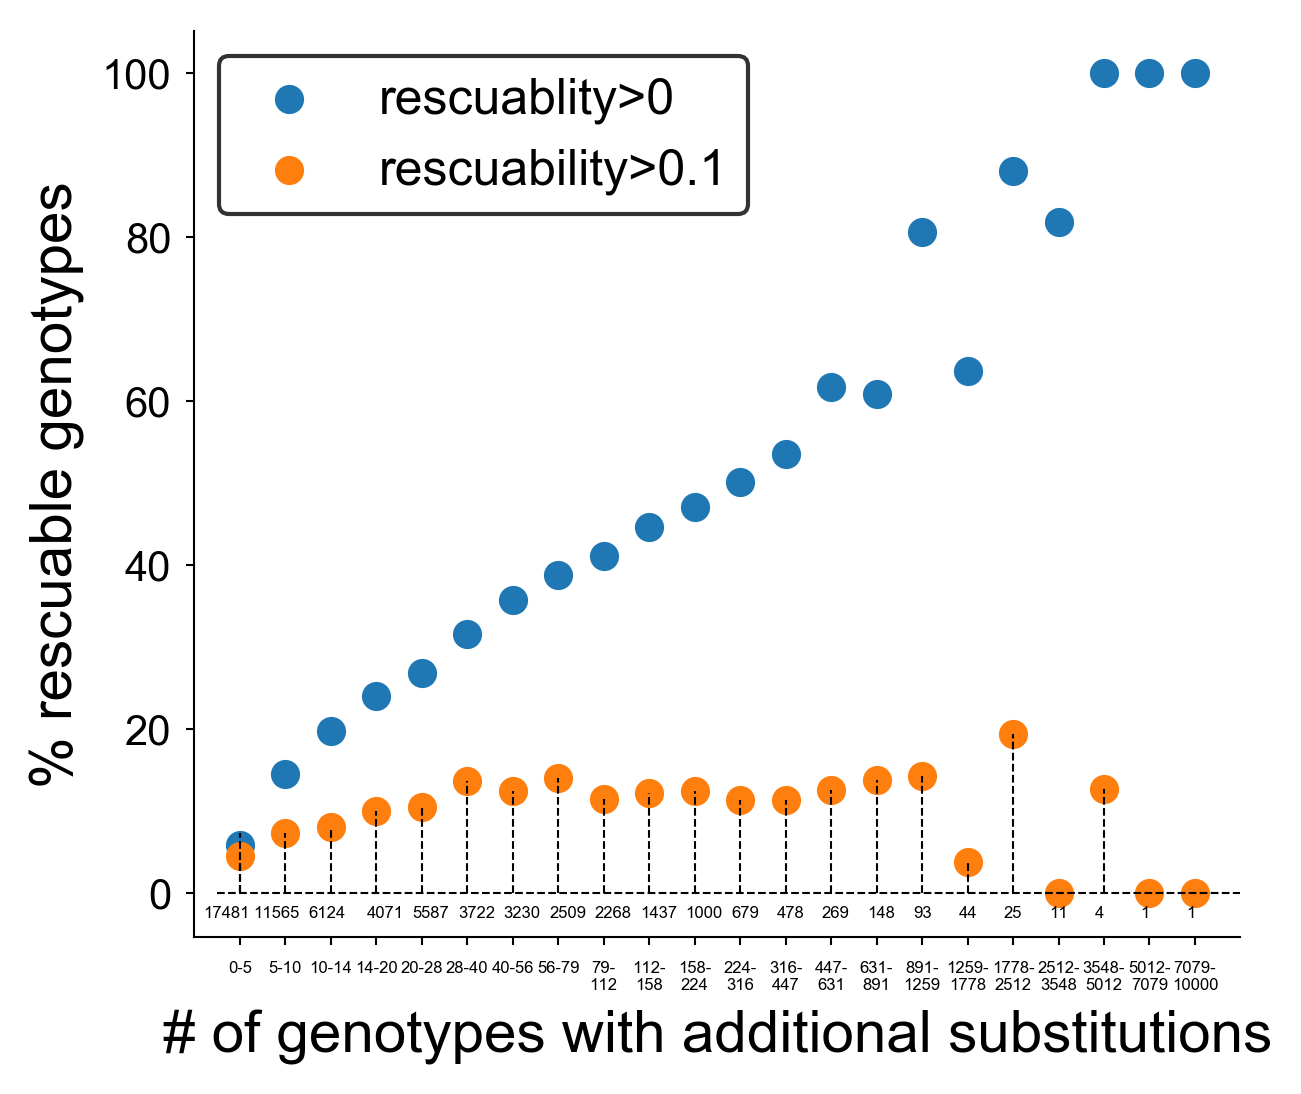

In [81]:
plt.figure(figsize=(4.5,4))
ax = plt.subplot(111)
log10allN_gap = np.linspace(1,4, 21)
rescuable_ratio0_list = [  ]
rescuable_ratio01_list = [  ]
num_genotypewithaddsub_list = [ ]
for subwithaddN in (5,10):
    res_ingapsubWithAdd = resall_data[(resall_data["#genotypesWithAddiSubs"]>=(subwithaddN-5)) & (resall_data["#genotypesWithAddiSubs"]<subwithaddN)]
    rescuable_ratio0 = 100*res_ingapsubWithAdd[res_ingapsubWithAdd["rescuability"]>0].shape[0]/res_ingapsubWithAdd.shape[0]
    rescuable_ratio01 = 100*res_ingapsubWithAdd[res_ingapsubWithAdd["rescuability"]>=0.1].shape[0]/res_ingapsubWithAdd.shape[0]
    print("%.2f-%.2f has %d variants"%(subwithaddN-5,subwithaddN,res_ingapsubWithAdd.shape[0]),end = "::::\t")
    rescuable_ratio0_list.append(rescuable_ratio0)
    rescuable_ratio01_list.append(rescuable_ratio01)
    num_genotypewithaddsub_list.append(res_ingapsubWithAdd.shape[0])
    if subwithaddN == 5:
        ax.vlines(0,0,rescuable_ratio01_list[0]-0.1,linestyles="--",linewidth = 0.5)
    else:
        ax.vlines(0,0,rescuable_ratio01_list[1]-0.1,linestyles="--",linewidth = 0.5)
        
    
for i in range(20):
    left = log10allN_gap[i]
    right = log10allN_gap[i+1]
    res_ingapsubWithAdd = resall_data[(resall_data["log10AllN"]>=left) & (resall_data["log10AllN"]<right)]
    #show the % rescuable genotypes (>0 ans > 0.1)
    rescuable_ratio0 = 100*res_ingapsubWithAdd[res_ingapsubWithAdd["rescuability"]>0].shape[0]/res_ingapsubWithAdd.shape[0]
    rescuable_ratio01 = 100*res_ingapsubWithAdd[res_ingapsubWithAdd["rescuability"]>=0.1].shape[0]/res_ingapsubWithAdd.shape[0]
    print("%.2f-%.2f has %d variants"%(left,right,res_ingapsubWithAdd.shape[0]),end = "::::\t")
    rescuable_ratio0_list.append(rescuable_ratio0)
    if right>1.5:
        rescuable_ratio01_list.append(rescuable_ratio01/(np.sqrt((i+0.5)/4.5)))
    else:
        rescuable_ratio01_list.append(rescuable_ratio01)
    num_genotypewithaddsub_list.append(res_ingapsubWithAdd.shape[0])
    ax.vlines(i,0,rescuable_ratio01_list[i],linestyles="--",linewidth = 0.5)


ax.scatter(range(22),rescuable_ratio0_list,label = "rescuablity>0")
ax.scatter(range(22),rescuable_ratio01_list,label = "rescuability>0.1")
plt.legend(fontsize = 12,edgecolor='black')
plt.xlabel("# of genotypes with additional substitutions",fontsize = 14)
plt.ylabel("% rescuable genotypes",fontsize = 14)
#add the text how many genotypes in each gap
plt.text(-0.8,-3,num_genotypewithaddsub_list[0],fontsize = 4)
plt.text(0.3,-3,num_genotypewithaddsub_list[1],fontsize = 4)
plt.text(1.5
         ,-3.0,num_genotypewithaddsub_list[2],fontsize = 4)
for i in range(3, 22):
    plt.text(i-0.2,-3
             ,num_genotypewithaddsub_list[i],fontsize = 4)
plt.hlines(0,-0.5,22,linestyles="--",linewidth = 0.5)   
plt.xticks(range(22), ["0-5","5-10","10-14","14-20","20-28","28-40","40-56","56-79","79-\n112","112-\n158","158-\n224","224-\n316",
                      "316-\n447","447-\n631","631-\n891","891-\n1259","1259-\n1778","1778-\n2512","2512-\n3548","3548-\n5012",
                      "5012-\n7079","7079-\n10000"],fontsize = 4)

plt.xlim(-1,22)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
#modify the lindth of the ticks
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#save the figure
plt.savefig(savedata_dir + "rescuablegenotypesareStable.png",dpi = 300)

In [82]:
#rescuable genotypes are rich in interface region
#load the ML data 
ml_data = pd.read_csv(readdata_dir + "MLFile/MLPrepare_data.tsv",sep = "\t")
ml_data

,aa_seq,dist_Scer,max_WCN_mutaa,min_WCN_mutaa,mean_WCN_mutaa,median_WCN_mutaa,max_conservation_mutaa,min_conservation_mutaa,mean_conservation_mutaa,median_conservation_mutaa,...,QIAN880103_true,PALJ810108_true,JOND750102_true,MAXF760104_true,GEIM800109_true,DAYM780101_true,FINA910103_true,#genotypesWithAddiSubs,rescuability,if_res
0,NAVGAVRGVERFGSGFAPLDEALSRSVVDL,4,3.340090,2.357107,2.706296,2.563993,0.771319,0.238430,0.486062,0.467250,...,4.06,32.04,63.64,32.60,33.98,198.6,31.6,335,0.127229,1
1,EAIGAVRGVERFGSGFAPLDEALSRSVVDF,4,3.340090,2.370304,2.847266,2.839335,0.771319,0.238430,0.528445,0.552015,...,3.83,32.19,63.32,30.35,33.73,194.4,31.1,764,0.178624,1
2,NAIGAVRGIERFGSGFAPLDEALSRSVVDL,5,3.340090,2.357107,2.687285,2.611244,0.771319,0.238430,0.536495,0.567219,...,3.64,31.36,63.72,32.64,34.08,194.4,31.6,118,0.180260,1
3,NAIGAVRGVERFGSGFAPLDEALSRSVVDF,5,3.340090,2.357107,2.749234,2.757682,0.771319,0.238430,0.496212,0.536810,...,3.41,31.33,63.15,32.69,34.43,192.7,31.6,195,0.057911,0
4,NAIGAVRGVTRFGSGFAPLDEALSRSVVDF,5,3.340090,2.357107,2.749234,2.757682,0.771319,0.238430,0.496212,0.536810,...,2.83,30.38,63.06,32.64,34.63,192.8,31.9,222,0.439164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31696,ASINRITNETKIQNSLSID,8,2.545626,2.207231,2.373764,2.362122,0.816579,0.209815,0.499521,0.533762,...,0.34,19.08,40.76,15.65,18.90,107.0,21.3,12,0.000000,0
31697,ASINRITNETKIQDSLCIK,8,2.545626,2.207231,2.397985,2.428277,0.778955,0.209815,0.450921,0.450525,...,0.21,19.55,40.36,14.58,17.44,105.2,21.3,10,0.000000,0
31698,ASINRITNETKIQDSLSIN,8,2.545626,2.207231,2.373764,2.362122,0.816579,0.209815,0.499521,0.533762,...,0.34,19.08,40.76,15.65,18.90,107.0,21.3,12,0.000000,0
31699,ASINRITNETKIQDSLSID,8,2.545626,2.207231,2.373764,2.362122,0.816579,0.209815,0.499521,0.533762,...,0.58,19.31,40.75,14.11,19.40,108.2,20.8,14,0.000000,0


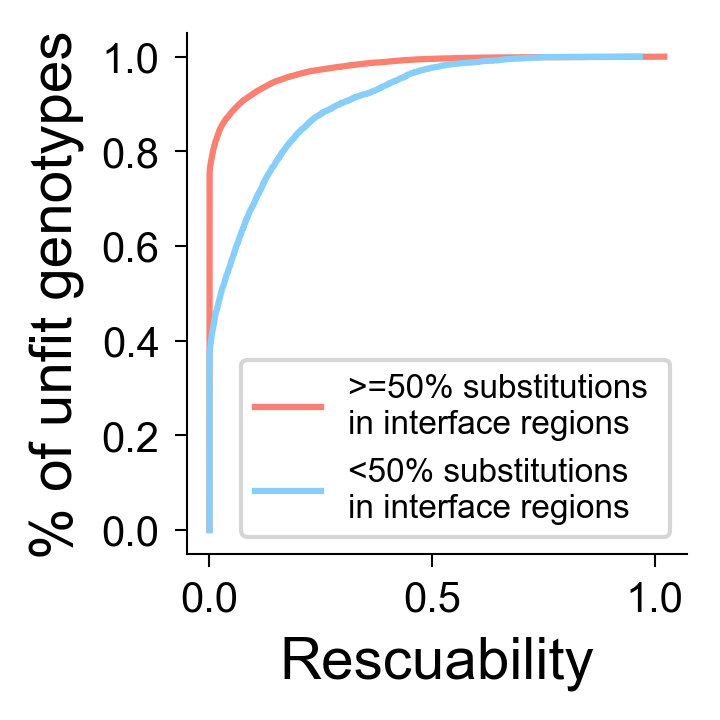

In [89]:
#plot the figure of the pdf plot
from statsmodels.distributions.empirical_distribution import ECDF

rescuability_50interface = ECDF(ml_data[ml_data["interface_ratio"]>=50]["rescuability"])
rescuability_less50interface = ECDF(ml_data[ml_data["interface_ratio"]<50]["rescuability"])

plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Add some text for labels, title and custom x-axis tick labels, etc.

plt.plot(rescuability_less50interface.x,rescuability_less50interface.y,label='>=50% substitutions \nin interface regions',color = "salmon")
plt.plot(rescuability_50interface.x, rescuability_50interface.y,label='<50% substitutions \nin interface regions',color = "lightskyblue")

plt.xticks(fontsize = 10,color = "black")
plt.yticks(fontsize = 10, color = "black")


#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)


# ax.set_xticks(x)
# ax.set_xticklabels(labels)
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)

# l = plt.legend([rects1, rects2], ['Instability', 'Helix','Strand'],
#     loc='upper right', scatterpoints=1,edgecolor='black',fontsize=5,
#         title_fontsize = 5)    
# for text in l.get_texts():
#     text.set_color("black")
    
#legend = legend.get_frame().set_linewidth(0.5)

plt.ylabel("% of unfit genotypes",fontsize=14,color = "black")
plt.xlabel("Rescuability",fontsize=14,
           color = "black")  ### 标记的其实是mean +- 1 S.D. 包含2/3 的数据
plt.legend(fontsize = 8)
plt.tight_layout()
plt.savefig(savedata_dir + "pdfmean_res_in_inteface.png",dpi = 300)


In [90]:
#the more in interface, the higher rescuability
def reverse_colourmap(cmap, name = 'my_cmap_r'): 
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

import matplotlib as mpl
my_cmap = reverse_colourmap(mpl.cm.RdBu)
from scipy.stats import gaussian_kde

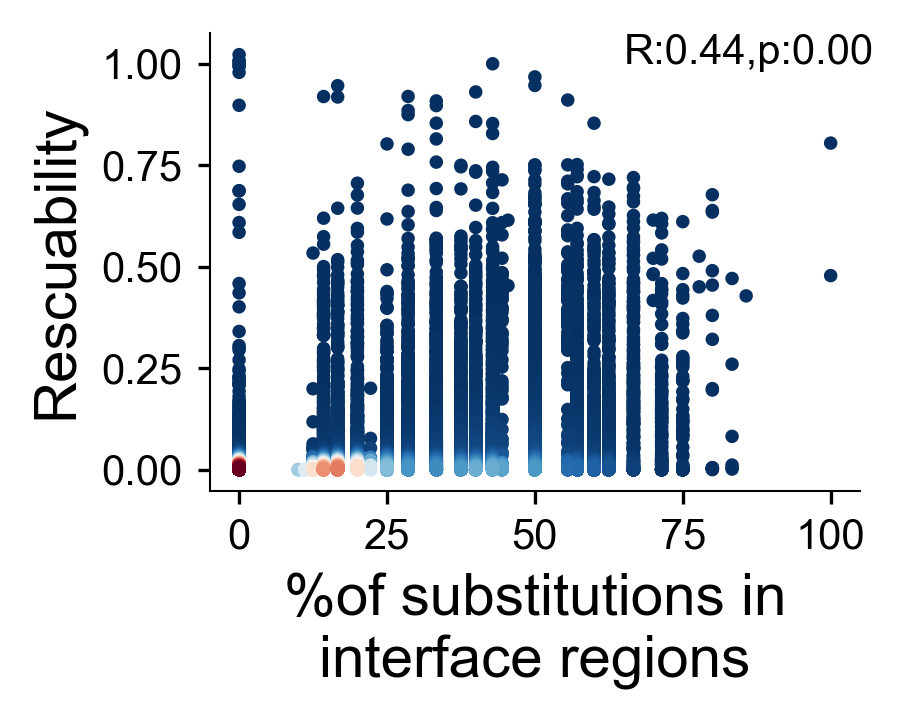

In [94]:
plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)

x = ml_data["interface_ratio"].values
y = ml_data["rescuability"].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
ax = plt.subplot()
ax.scatter(x, y, c=z,s=5,cmap=
        my_cmap)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)


ax = plt.gca()
ax.tick_params( axis='both',length=3)

plt.tight_layout()  

plt.xlabel("%of substitutions in\ninterface regions", fontsize = 14)
plt.ylabel("Rescuability", fontsize = 14)
#label the correlation 
plt.text(65,1.0, "R:0.44,p:0.00")
plt.tight_layout()
# plt.savefig(save_figure2 + "scattermean_res_in_inteface.pdf",dpi = 300)
plt.savefig(savedata_dir + "scattermean_res_in_inteface.png",dpi = 300)

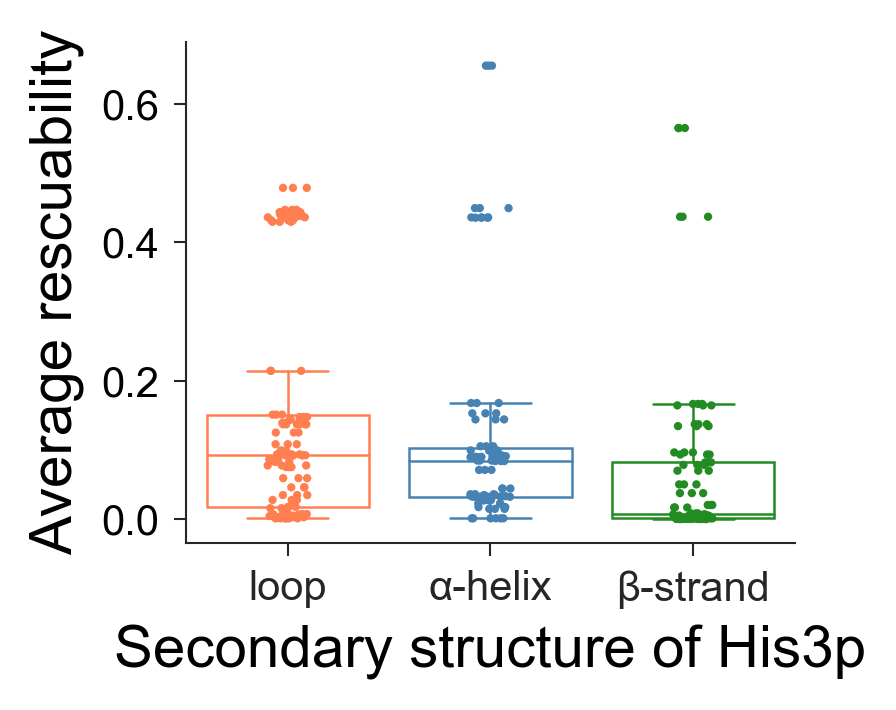

In [150]:
#the avergae rescuability is different in helix/loop/strand regions
#load single rescuability data 
import seaborn as sns
rescuability_singlesiteData = pd.read_csv(readdata_dir + "RescuabilityFile/singleSiteRescuability.txt",sep = "\t")
rescuability_singlesiteData = rescuability_singlesiteData[rescuability_singlesiteData["#unfitGenotypes"]>0]
plt.figure(figsize=(3.0,2.5))
ax = plt.subplot(111)
sns.boxplot(x= 'ss',y='rescuability_mean',linewidth=0.6,color="white",fliersize=0,
                data = rescuability_singlesiteData[rescuability_singlesiteData["rescuability_mean"]<=0.75],ax=ax,
            order = ['loop','helix','strand'] )

#set each single box artiest
color_map = {0:"coral",1:"steelblue",2:"forestgreen"}
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = color_map[i]
    artist.set_edgecolor(col)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

    sns.stripplot(x= 'ss',y='rescuability_mean',size=2
              ,jitter=0.1, data = rescuability_singlesiteData[rescuability_singlesiteData["rescuability_mean"]<=0.75],ax=ax,
                  order = ['loop','helix','strand'],palette = 
                  ["coral","steelblue","forestgreen"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.yticks(fontsize = 10,color = "black")
plt.ylabel("Average rescuability",fontsize=14,color = "black")
plt.xlabel("Secondary structure of His3p",fontsize=14,color = 'black')

#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)
plt.xticks([0,1,2],["loop","α-helix","β-strand"],fontsize=10)
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "ss_box_res_small075.png",dpi = 300)

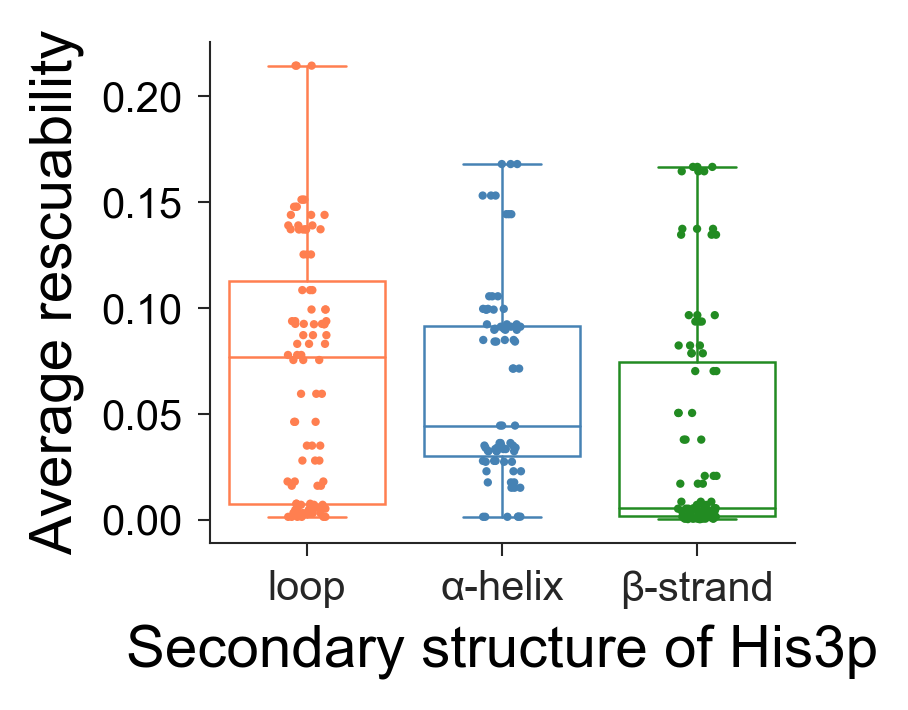

In [154]:
#repeat the same figure but with different cut-off
#plot three box plots in helix/strand/disorder three parts!
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(3.0,2.5))
sns.set(style='ticks')
ax = plt.subplot(111)
sns.boxplot(x= 'ss',y='rescuability_mean',linewidth=0.6,color="white",fliersize=0,
                data = rescuability_singlesiteData[rescuability_singlesiteData["rescuability_mean"]<=0.33],ax=ax,
             order = ['loop','helix','strand']  )

#set each single box artiest
color_map = {0:"coral",1:"steelblue",2:"forestgreen",}
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = color_map[i]
    artist.set_edgecolor(col)


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)


    sns.stripplot(x= 'ss',y='rescuability_mean',size=2
              ,jitter=0.1, data = rescuability_singlesiteData[rescuability_singlesiteData["rescuability_mean"]<=0.33],ax=ax,
                  order = ['loop','helix','strand']  ,palette = 
                  ["coral","steelblue","forestgreen"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.yticks(fontsize = 10,color = "black")
plt.ylabel("Average rescuability",fontsize=14,color = "black")
plt.xlabel("Secondary structure of His3p",fontsize=14,color = 'black')

#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)
plt.xticks([0,1,2],["loop","α-helix","β-strand"],fontsize=10)
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "ss_box_res_small033.png",dpi = 300)

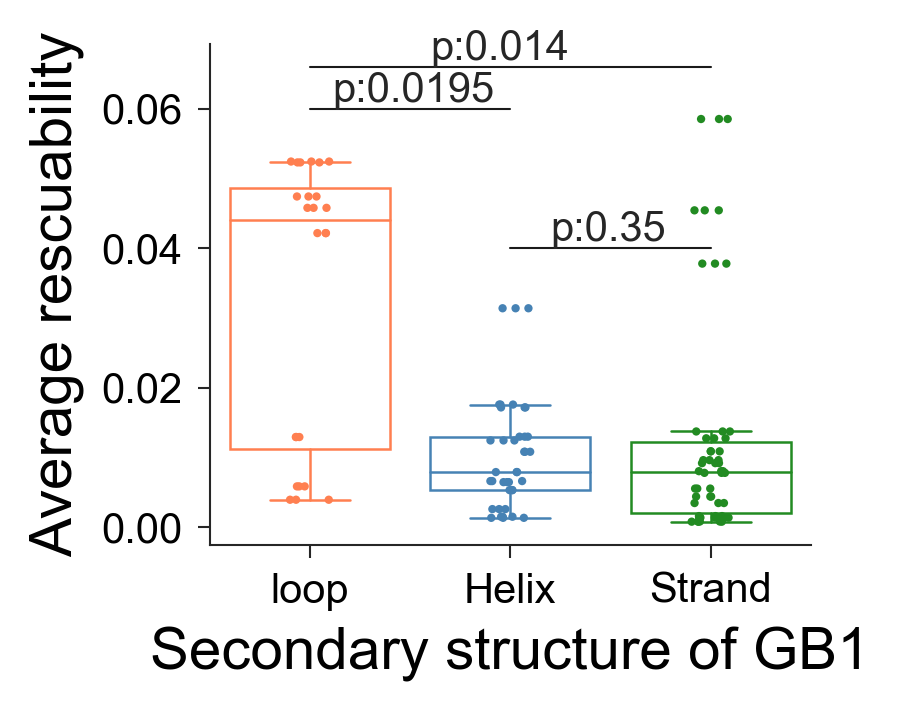

In [151]:
#IGB also follow this 
igb_data = pd.read_csv(readdata_dir + "RescuabilityFile/IGB.txt",sep = "\t")
#plot three box plots in helix/strand/disorder three parts!
plt.figure(figsize=(3.0,2.5))
sns.set(style='ticks')
ax = plt.subplot(111)
sns.boxplot(x= 'SS',y='rescuability_mean ',linewidth=0.6,color="white",fliersize=0,
                data = igb_data,ax=ax,order = ['loop','Helix','Strand'])

#set each single box artiest
color_map = {0:"coral",1:"steelblue",2:"forestgreen"}
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = color_map[i]
    artist.set_edgecolor(col)


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)


    sns.stripplot(x= 'SS',y='rescuability_mean ',size=2
              ,jitter=0.1, data = igb_data,ax=ax,order =['loop','Helix','Strand'],palette = 
                  ["coral","steelblue","forestgreen"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(fontsize = 10,color = "black")
plt.yticks(fontsize = 10,color = "black")
plt.ylabel("Average rescuability",fontsize=14,color = "black")
plt.xlabel("Secondary structure of GB1",fontsize=14,color = 'black')

#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)

plt.tight_layout()
#save the figure
plt.plot([0,1],[0.06,0.06],color = "k",linewidth=0.5)
plt.plot([1,2],[0.04,0.04],color = "k",linewidth=0.5)
plt.plot([0,2],[0.066,0.066],color = "k",linewidth=0.5)

plt.text(0.11,0.061, "p:0.0195",fontsize = 10)
plt.text(1.2,0.041, "p:0.35",fontsize = 10)
plt.text(0.6,0.067, "p:0.014",fontsize = 10)
plt.savefig(savedata_dir + "igb.png", dpi = 300)

Index(['site ', 'rescuability_sum ', 'count ', 'rescuability_mean ',
       'rescuability_std ', 'aa ', 'ss ', 'position ', 'SS'],
      dtype='object')